In [6]:
#Code adapted from Sesison 12.1
import numpy as np
import matplotlib.pyplot as plt


class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size=100, temperature=300, speedup=None):
        '''
        Initialize a new Ising simulation.

        Parameters:

            size (int) The number of cells along each side of the
              square grid. Default: 100.

            temperature (float) The temperature at which to run the
              simulation, measured in Kelvin. The Curie temperature
              of iron is at 1043 K. Default: 300 (approximately room
              temperature).

            speedup (int) The number of cell flips to do per call to
              the update() method. Default: size ** 2.
        '''
        self.size = size
        self.temperature = temperature
        if speedup is None:
            speedup = self.size ** 2
        self.speedup = speedup

        # Set random initial state
        self.state = np.random.choice(
            [-1, 1], size=(self.size, self.size))
        self.step = 0
        self.history = {
            'step': [],
            'magnetism': []}

    def update(self, annealing=False, annealing_step=100):
        # Flip the signs of self.speedup cells
        for k in range(self.speedup):
            # Pick a random cell to flip
            x, y = np.random.randint(self.size, size=2)
            # Change in energy from current state to next state if we flip
            delta_E = (
                2 * self.J * self.state[x, y] * (
                    self.state[(x + 1) % self.size, y] +
                    self.state[(x - 1) % self.size, y] +
                    self.state[x, (y + 1) % self.size] +
                    self.state[x, (y - 1) % self.size]))
            # Log probability of changing state
            log_p = -delta_E / (self.temperature * self.kB)
            # Flip cell with probability exp(log_p)
            if np.log(np.random.uniform(0, 1)) < log_p:
                self.state[x, y] = -self.state[x, y]
            
            #If annealing, every annealing_step step, decrease temperature by 1
            if annealing:
                if (self.step+k) % annealing_step == 0 and self.temperature>0:
                    self.temperature-=1

        self.step += self.speedup
        self.history['step'].append(self.step)
        self.history['magnetism'].append(self.state.mean())
        
        
    def avg_magnetization(self):
        return np.mean(self.state)

    def display_state(self):
        # Plot current state
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step))

    def display_history(self):
        # Plot history of average magnetism
        step = np.array(self.history['step'])
        for y in [-1, 0, 1]:
            plt.plot([step[0], step[-1]], [y, y], 'k:')
        plt.plot(step, self.history['magnetism'], 'k-')
        plt.xlabel('step')
        plt.ylabel('average magnetism')
        plt.title('Temperature: ' + str(self.temperature) + ' K')

In [9]:
def simulate_average_magnetization(T, steps, print_progress=True):
    sim = IsingSimulation(size=20, temperature=T)
    for _ in range(steps):
        sim.update()
        if _%(steps/10)==0: 
            print('Progress {}%'.format(_/steps*100))

    return sim.avg_magnetization()

In [10]:
#This takes forever to run, soo I turned down the sample size and the number of iterations for each
temperature = 1
steps = 10**4

avg_magnetization_list = [simulate_average_magnetization(temperature, steps) for _ in range(10)]

Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Pr

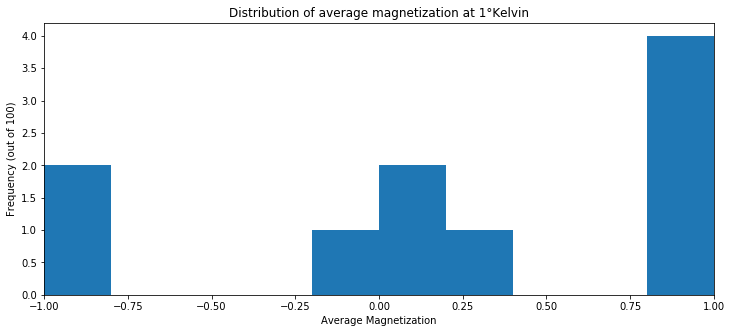

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(avg_magnetization_list, bins=10)
plt.xlim(-1, 1)
plt.title('Distribution of average magnetization at 1°Kelvin')
plt.xlabel("Average Magnetization")
plt.ylabel("Frequency (out of 100)")
plt.show()

In [12]:
def simulate_average_magnetization_with_annealing(T, steps, print_progress=True):
    sim = IsingSimulation(size=20, temperature=T)
    for _ in range(steps):
        sim.update(annealing=True, annealing_step=100)
        if _%(steps/10)==0: 
            print('Progress {}%'.format(_/steps*100))

    return sim.avg_magnetization()

temperature = 2000
steps = 10**4

avg_magnetization_list = [simulate_average_magnetization(temperature, steps) for _ in range(10)]

Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Progress 70.0%
Progress 80.0%
Progress 90.0%
Progress 0.0%
Progress 10.0%
Progress 20.0%
Progress 30.0%
Progress 40.0%
Progress 50.0%
Progress 60.0%
Pr

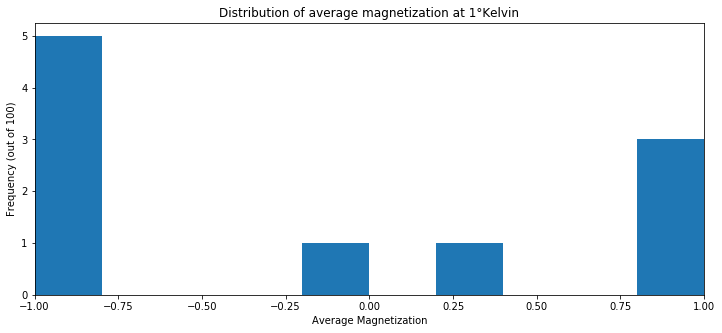

In [13]:
plt.figure(figsize=(12, 5))
plt.hist(avg_magnetization_list, bins=10)
plt.xlim(-1, 1)
plt.title('Distribution of average magnetization at 1°Kelvin')
plt.xlabel("Average Magnetization")
plt.ylabel("Frequency (out of 100)")
plt.show()

As predicted, the distribution is more consistently at the extremes of average magnetization, -1 and +1, when the temperature is gradually annealed from high to low. However, we would have needed to run more simulations for a larger number of steps to solidify these early observations. Indeed, for cases where we run the 

In [ ]:
0723 184 183